<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/mathematics-modeling_%20Notes/%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E5%AF%BC%E8%AE%BA_Datawhale/%E7%AC%AC%203%20%E7%AB%A0%20%E5%87%BD%E6%95%B0%E6%9E%81%E5%80%BC%E4%B8%8E%E8%A7%84%E5%88%92%E6%A8%A1%E5%9E%8B/Notes_Unit3__3_5_%26%26_3_6_%E9%9D%9E%E7%BA%BF%E6%80%A7%E8%A7%84%E5%88%92(scipy_optimize_minimize%2C_sko_GA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5>第 3 章 函数极值与规划模型 </font>

* <font size=4>3.5 从线性规划到 **非线性规划** </font>

* <font size=4>3.6 非线性规划的 **建模案例** </font>

$~$



>整理自：
>
>开源内容：https://github.com/datawhalechina/intro-mathmodel
>
>在线学习网站：http://www.datawhale.cn/learn/summary/85

非线性规划问题： **目标函数**或**约束**条件中**至少有一个**是非线性函数

二次规划 (Quadratic Programming，**QP**)

$\text{minimize}~~ f(x)=\frac{}{}x^\top Hx+g^\top x$

1、 若 $H$ 是**半正定**矩阵，若是有局部最优解，则这个局部最优解就是全局最优解。但这个全局最小值可能是**不唯一**的。

2、若 $H$ 是**正定**矩阵，则该问题有**唯一的全局最小值**。

3、若 $H$ 为**非正定**矩阵，则目标函数是有**多个驻点和局部极小点**的 NP 难问题。

4、若 $H=0$，二次规划问题就变成**线性规划**问题。

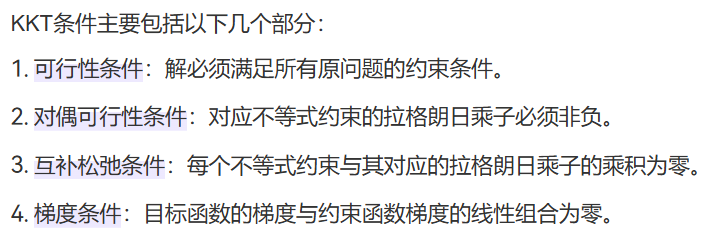

对于问题：

$\text{minimize}~~(x)$

满足：

$\begin{cases}h(x)=0\\
g(x)\leq0\end{cases}$

引入两个不同乘子，当且仅当满足以下的 KKT 条件时取得极值：

$\text{minimize}~~L(x,\lambda,\mu)=f(x) +\lambda h(x)+\mu g(x)$

KKT 条件：

$\begin{cases}\frac{\partial L}{\partial x}=0~~~~~~\color{blue}{导数}\\
\lambda \neq 0~~~~~~\color{blue}{等式约束的系数}\\
\mu\geq0~~~~~~\color{blue}{不等式约束的系数}\\
h(x)=0\\
g(x)\leq0\end{cases}$




#  3.6 非线性规划的 建模案例

##  例 3.6.1 商品进货获取最大利润




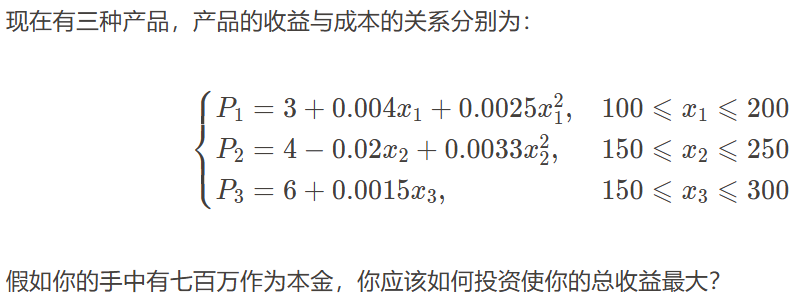

###  用 scipy.optimize.minimize 求解

In [ ]:
from scipy.optimize import minimize

# 目标函数： 最大化  P1 + P2 + P3 注意写成最小化形式 ！！！
fun = lambda x: -13 - 0.004 * x[0] + 0.02 * x[1] - 0.0015 * x[2] - \
          0.0025 * x[0]**2 - 0.0033 * x[1]**2

# 约束 x1 + x2 + x3 <= 700
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] +  x[1] + x[2] - 700})

# 边界
bnds = ((100, 200), (150, 250), (150, 300))

res = minimize(fun,(100, 200, 400), method='SLSQP', bounds=bnds, constraints=cons)
# (100, 200, 400) 为对 x 的初始猜测

print("目标的最小值：", res.fun)
print("最优解 x =", res.x)
print("是否优化成功：", res.message)

目标的最小值： -315.49999999999403
最优解 x = [200. 250. 300.]
是否优化成功： Optimization terminated successfully


###  用 遗传算法  库函数sko.GA 求解

In [ ]:
!pip install scikit-opt

best_x: [200. 250. 300.] 
 best_y: [-315.5]


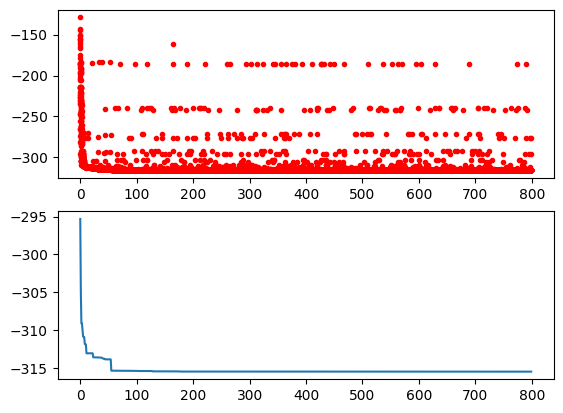

In [ ]:
## !pip install scikit-opt

# 定义 目标函数 注意写成最小化形式 ！！！
def func(x):
    x1, x2, x3 = x
    return -13 - 0.004 * x1 + 0.02 * x2 - 0.0015 * x3 - \
          0.0025 * x1**2 - 0.0033 * x2**2

# 执行遗传算法
from sko.GA import GA

ga = GA(func=func, n_dim=3, size_pop=50, max_iter=800, prob_mut=0.001, lb=[100, 150, 150], ub=[200, 250, 300], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

# 绘图
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

# 可视化目标函数的历史最小值 和 最小值的累积值，已收敛

##  —— 补充： scipy.optimize.minimize 文档整理

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#minimize

###   求解示例

In [ ]:
from scipy.optimize import minimize

# 目标函数
fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2

# 约束
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})

# 边界
bnds = ((0, None), (0, None))

res = minimize(fun, (2, 0), method='SLSQP', bounds=bnds,
               constraints=cons)

print("目标的最小值：", res.fun)
print("最优解 x =", res.x)
print("是否优化成功：", res.message)

目标的最小值： 0.8000000011920985
最优解 x = [1.4 1.7]
是否优化成功： Optimization terminated successfully


##  —— 补充： Scikit-opt（或 sko ）文档整理

https://scikit-opt.github.io/

Scikit-opt（或 sko ）是 Swarm Intelligence Algorithm 的 Python 模块。如遗传算法、粒子群优化、模拟退火、蚁群算法、免疫算法、人工鱼群算法等。

遗传算法 (Genetic Algorithm， GA)：一种模拟自然界生物进化过程的**优化算法**，通过模拟基因交叉、变异等操作来**搜索问题的最优解**。

* https://scikit-opt.github.io/scikit-opt/#/en/README?id=_2-genetic-algorithm

### 求解示例  〔 sko.GA 〕

In [ ]:
!pip install scikit-opt

best_x: [-8.94069698e-08 -2.98023233e-08] 
 best_y: [0.]


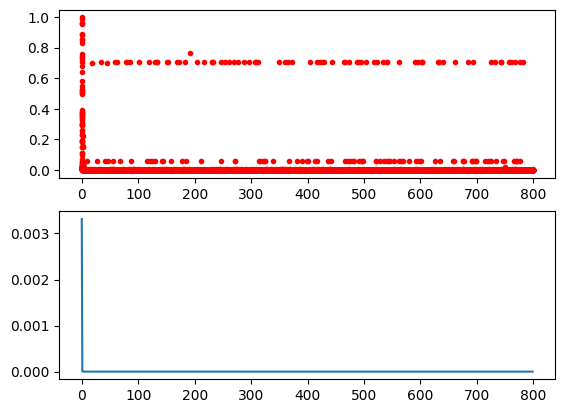

In [ ]:
## !pip install scikit-opt

# 定义问题
import numpy as np


def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    '''
    x1, x2 = p
    x = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(x)) - 0.5) / np.square(1 + 0.001 * x)

# 执行遗传算法
from sko.GA import GA

ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, prob_mut=0.001, lb=[-1, -1], ub=[1, 1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

# 绘图
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

# 可视化目标函数的历史最小值 和 最小值的累积值，已收敛

## 例 3.6.2 料场选址 〔 用 scipy.optimize.minimize 求解 〕

某公司有 **$6$ 个建筑工地**要开工，每个工地的位置(用平面坐标系 $a,b$ 表示，距离单位:千米)及水泥日用量 $d$ (吨)由下表给出。

规划设立 **2 个料场**位于 $A,B$，**日储量各为 20 吨**。假设从料场到工地之间均有直线道路相连。

试确定料场的位置，并制定每天的供应计划，即从 $A,B$ 两料场分别向各工地运送多少吨水泥,

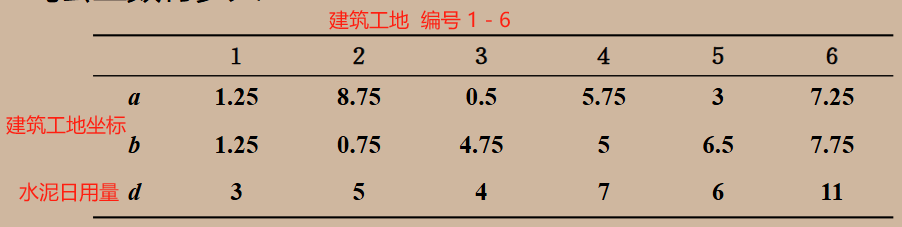

[修改参考自链接：华中农业大学《数学建模》(中国大学 MOOC) 4.8 非线性规划](https://www.icourse163.org/learn/HZAU-1001658002?tid=1472021457#/learn/content?type=detail&id=1257271027&cid=1290631079)

水泥运送的总距离最短

**参数：**

2 个**料场的位置**分别为 $(x_1,y_1),~~(x_2,y_2)$

* $(x_i,y_i)~~~i=1,2$

**工地位置**：$(a_j,b_j)~~~j=1,2,3,4,5,6$

$c_{i,j}$： 料场 $i$ 运送到 建筑工地 $j$ 的水泥**运量**

——————

$\text{minimize}~~\sum\limits_{i=1}^2\sum\limits_{j=1}^6c_{i,j}\sqrt{(x_i-a_j)^2+(y_i-b_j)^2}$

满足：

$\begin{cases}\sum\limits_{i=1}^2c_{i,j}= d_j, ~~j=1,2,3,4,5,6~~~~\color{blue}{必须满足水泥用量需求}\\
\sum\limits_{j=1}^6c_{i,j}\leq20,~~i=1,2~~~~\color{blue}{搬到其它地方的水泥量总和不能超过库存}\\
c_{i,j}\geq0,~~\forall~i,j\\
x_1, ~~y_1,~~x_2,~~y_2\geq0\end{cases}$


In [ ]:
from scipy.optimize import minimize
import numpy as np

# 定义 目标函数 注意写成最小化形式 ！！！
def func(x):
  # A1, A2, A3, A4, A5, A6, B1, B2, B3, B4, B5, B6, x1, y1, x2, y2 = x
# x[0] x[1] x[2] x[3] x[4] x[5]    A1, A2, A3, A4, A5, A6
# x[6] x[7] x[8] x[9] x[10] x[11]   B1, B2, B3, B4, B5, B6
# x[12] x[13]  x1, y1
# x[14] x[15]  x2, y2
  s = 0  # 目标值
  a = [1.25, 8.75, 0.5, 5.75, 3, 7.25]
  b = [1.25, 0.75, 4.75, 5, 6.5, 7.75]
  for j in range(6):  # 料场 A 到 工地 j 的水泥运量和
    s += x[j] * np.sqrt((x[12] - a[j])**2 + (x[13] - b[j])**2) + \
    x[j + 6] * np.sqrt((x[14] - a[j])**2 + (x[15] - b[j])**2) # 料场 B 到 工地 j 的水泥运量和

  return s

# 约束： 等式 或  ≥ 形式的不等式
cons = ({'type': 'eq', 'fun': lambda x: x[0] + x[6] - 3},  # 工地 1 水泥吨数  需求侧
     {'type': 'eq', 'fun': lambda x: x[1] + x[7] - 5},  # 工地 2 水泥吨数
     {'type': 'eq', 'fun': lambda x: x[2] + x[8] - 4},  #    ...
     {'type': 'eq', 'fun': lambda x: x[3] + x[9] - 7},
     {'type': 'eq', 'fun': lambda x: x[4] + x[10] - 6},
     {'type': 'eq', 'fun': lambda x: x[5] + x[11] - 11},  # 工地 6 水泥吨数
     {'type': 'ineq', 'fun': lambda x: 20 - (x[0] + x[1] + x[2] + x[3] + x[4] + x[5])}, # 要为 ≥ 0 形式 料场 A   供给方 不能超过
     {'type': 'ineq', 'fun': lambda x: 20 - (x[6] + x[7] + x[8] + x[9] + x[10] + x[11])}  # # 料场 B
    )


# 边界
bnds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), \
     (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), \
     (0, None), (0, None),\
     (0, None), (0, None))

x_0 = np.ones(16)  # 猜测的 x 的初始值
res = minimize(func, x_0, method='SLSQP', bounds=bnds,
               constraints=cons)

print("目标的最小值：", res.fun)
print("最优解 x =", np.around(res.x, decimals=2))
print("是否优化成功：", res.message)

目标的最小值： 89.88891789921813
最优解 x = [ 3.    5.    4.    7.    1.    0.    0.    0.    0.    0.    5.   11.
  5.74  4.99  7.25  7.75]
是否优化成功： Optimization terminated successfully


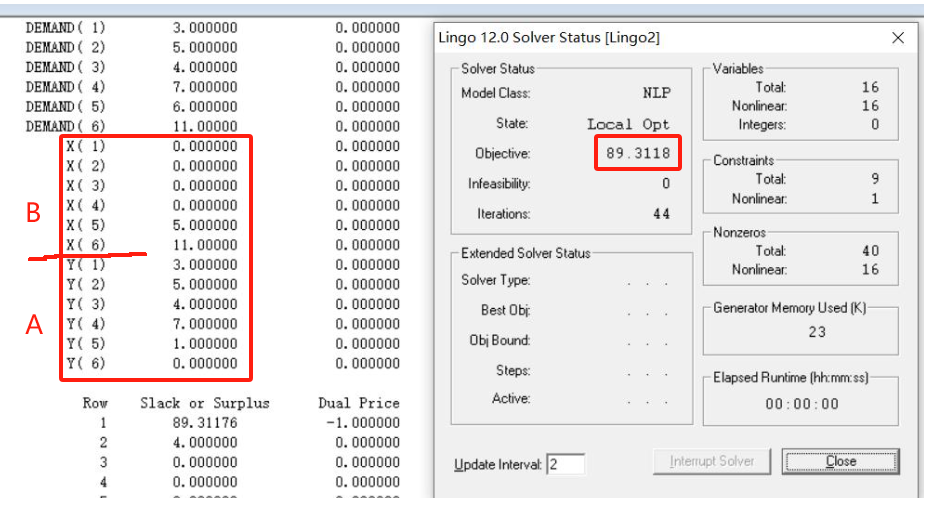